# EDA for credit default risk data

### Loading data

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [149]:
df = pd.read_csv('credit_risk_data.csv')
df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [150]:
df.shape

(32581, 13)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32581 non-null  int64  
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(6), object

### Cleaning data

In [152]:
# Dropping unnamed index column
df = df.drop(df.columns[0],  axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [153]:
# checking for duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

165


In [154]:
# finding missing values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [155]:
df['person_emp_length'].describe()

count    31529.00000
mean         4.79051
std          4.14549
min          0.00000
25%          2.00000
50%          4.00000
75%          7.00000
max        123.00000
Name: person_emp_length, dtype: float64

### Imputating missing values with median

As we can see in the visualization and the df describe the data is skewed so median is a better statistic than mean in this case.

In [156]:
# imputing missing values for person_emp_length
median_emp = df['person_emp_length'].median()
df['person_emp_length'].fillna(median_emp, inplace=True)

In [157]:
df['loan_int_rate'].describe()

count    29321.000000
mean        11.017265
std          3.241680
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

In [158]:
# imputing missing values forloan_int_rate with median grouped by loan_grade
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(
    lambda x: x.fillna(x.median())
)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [159]:
print(df.isnull().sum())
print('Shape :',df.shape)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
Shape : (32416, 12)


### Univariate Visualization 

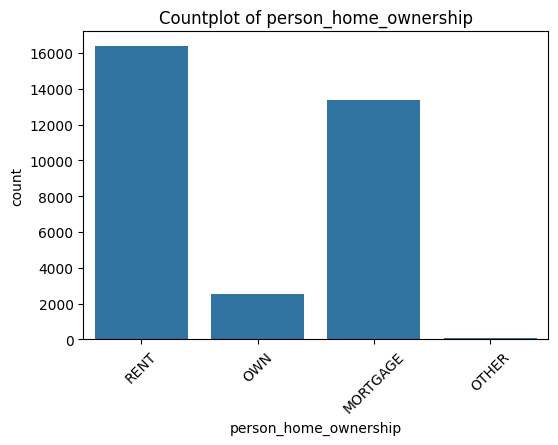

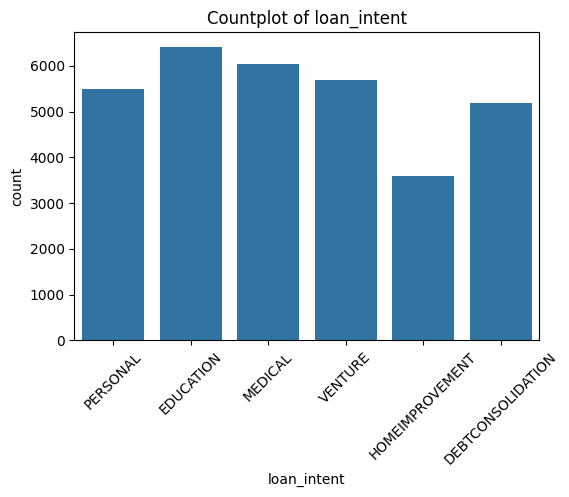

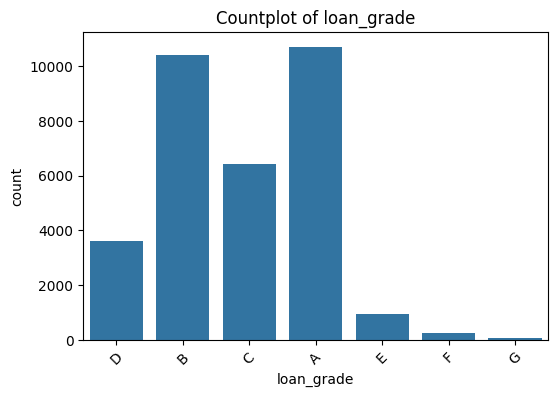

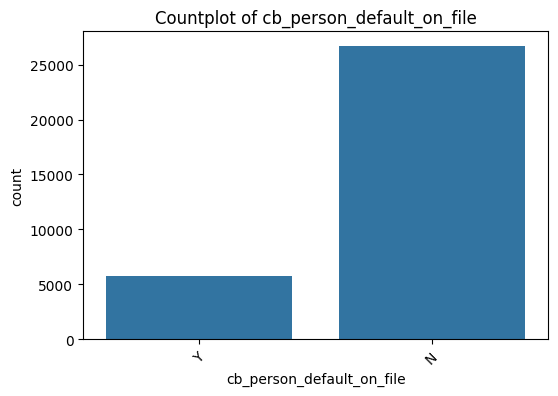

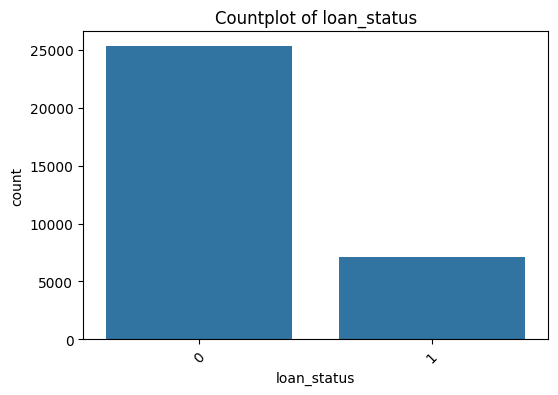

In [160]:
# Visualizing categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

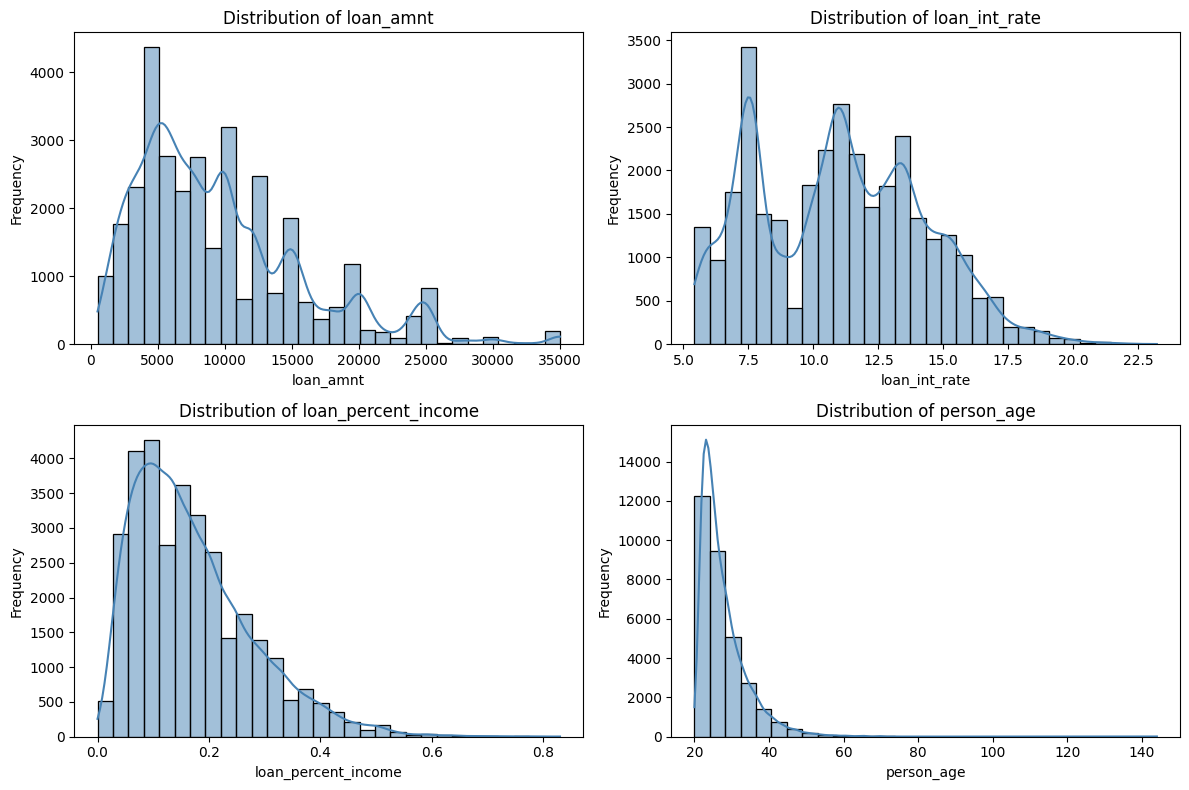

In [161]:
hist_cols = ['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_age']
categorical_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','loan_status']
numeric_cols = ['person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','person_age', 'person_income']

# Create a grid of subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # flatten to make indexing easier

for i, col in enumerate(hist_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_ylabel('Frequency')

# Remove extra spacing and display
plt.tight_layout()
plt.show()

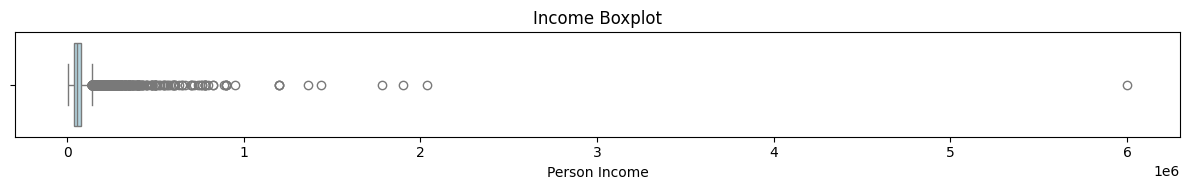

In [162]:
plt.figure(figsize=(12,2))
sns.boxplot(data=df, x='person_income', color='lightblue')
plt.title('Income Boxplot')
plt.xlabel('Person Income')
plt.tight_layout()
plt.show()

In [163]:
df['person_income'].describe()

count    3.241600e+04
mean     6.609164e+04
std      6.201558e+04
min      4.000000e+03
25%      3.854200e+04
50%      5.500000e+04
75%      7.921800e+04
max      6.000000e+06
Name: person_income, dtype: float64

 There are outliers in `person_income`. The distribution of income is uneven and left skewed.

### Bivariate visualization

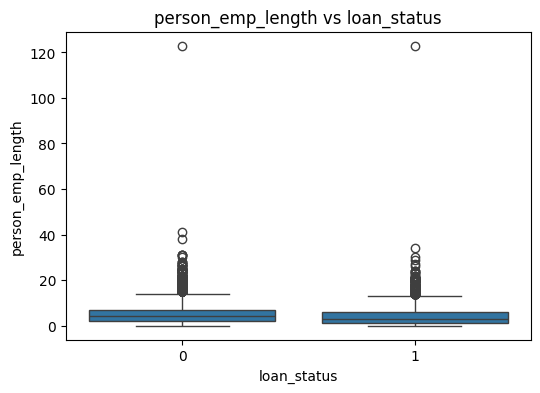

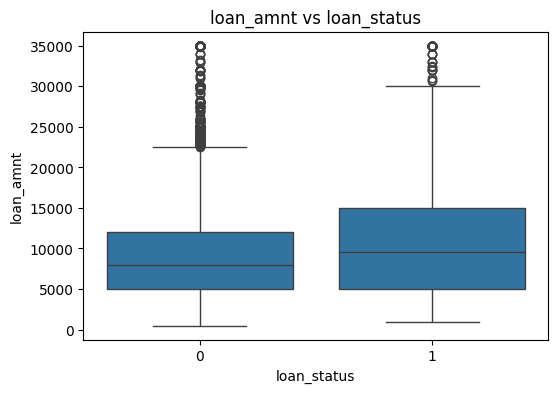

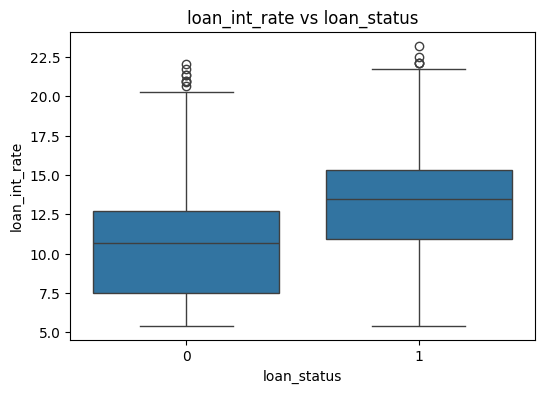

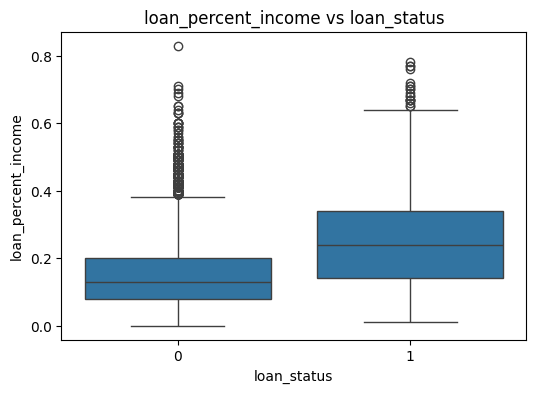

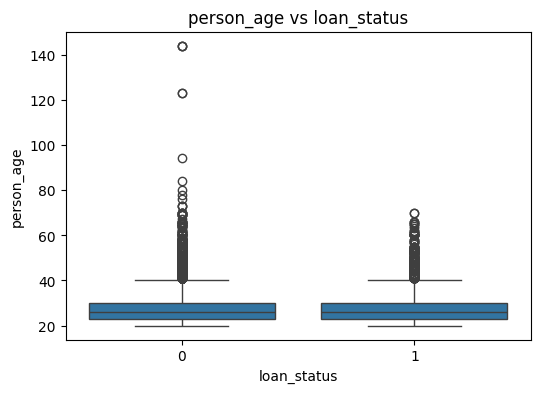

In [164]:
for col in numeric_cols[0:len(numeric_cols)-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} vs loan_status')
    plt.show()

### Encoding the catagorical variables

In [165]:
df = pd.get_dummies(df, columns=categorical_cols[:-1], drop_first=True)
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


### Checking for class imbalance
As we can see below the target variable has a class imbalance and in order to reduce the impact on training we will use under-sampling(SMOTE).

In [166]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64

### Feature selection


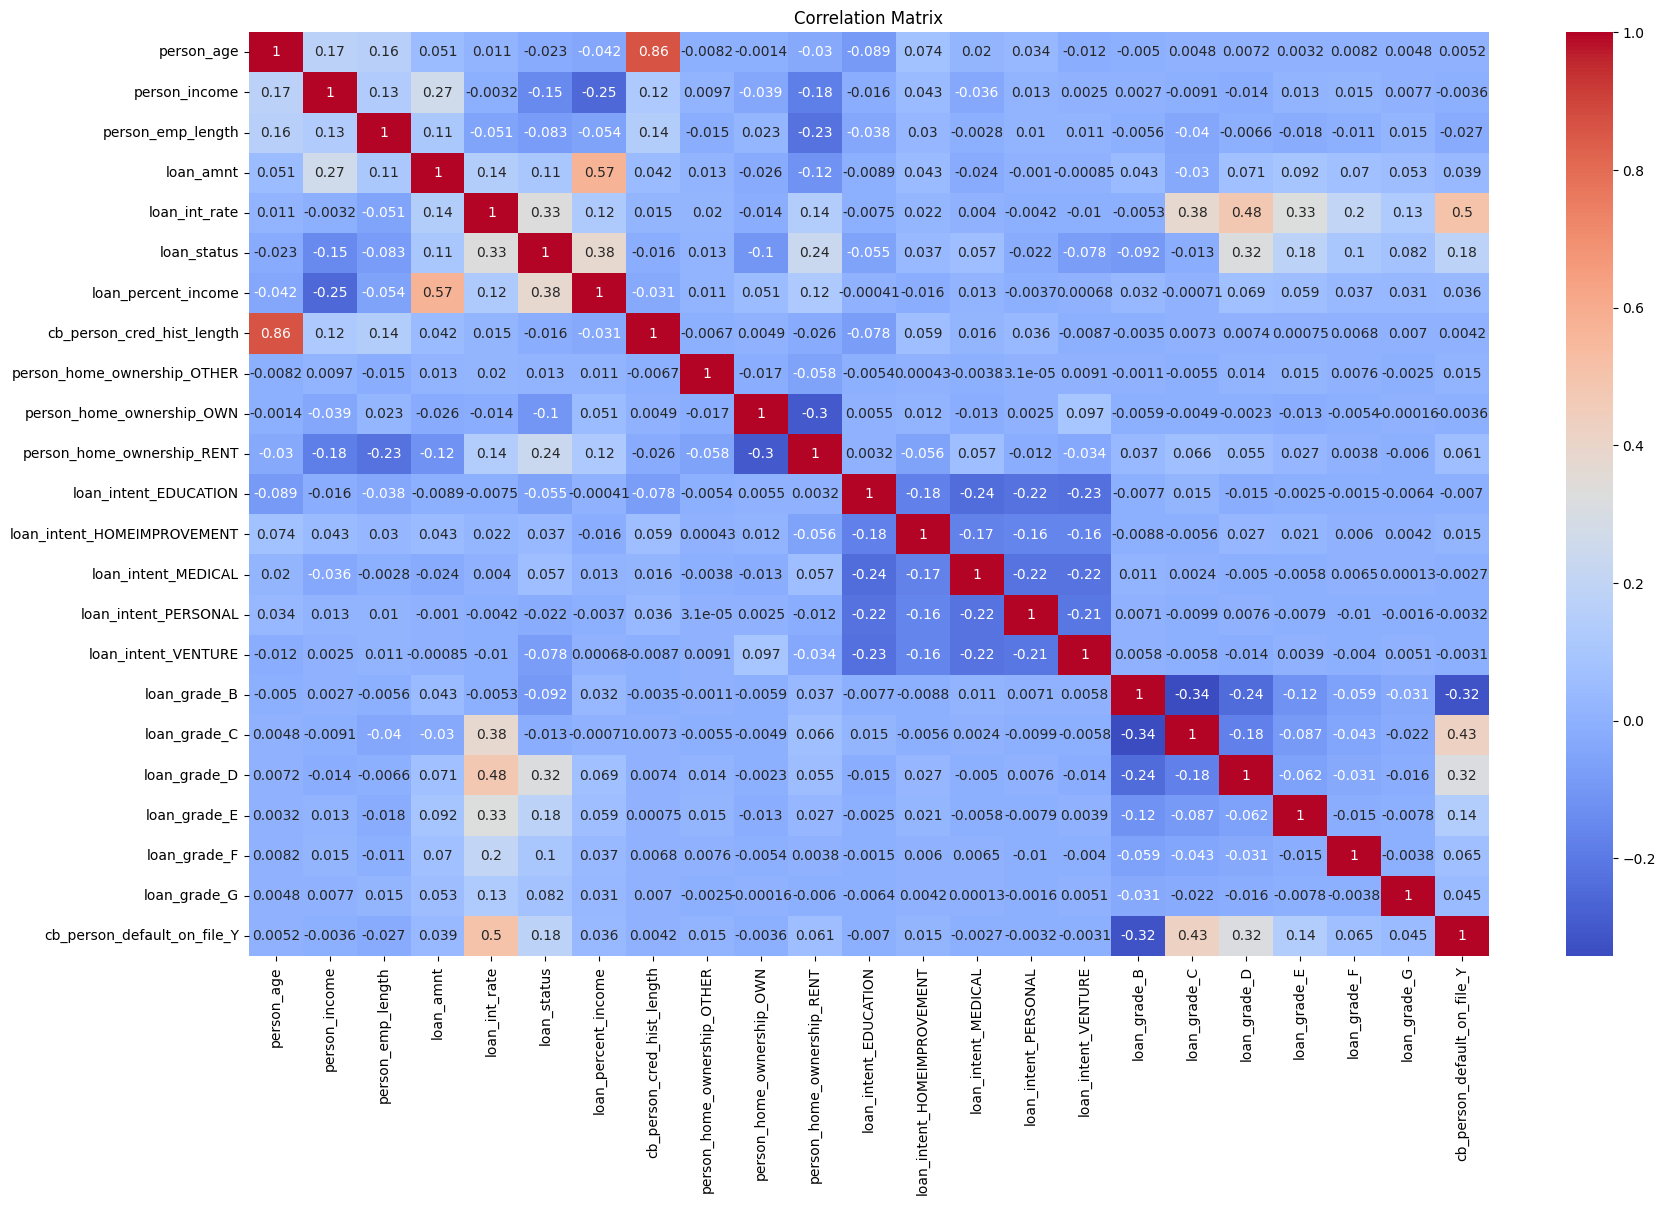

In [167]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [168]:
# correlation with target variable
corr = df.corr(numeric_only=True)
corr['loan_status'].sort_values(ascending=False)

loan_status                    1.000000
loan_percent_income            0.379697
loan_int_rate                  0.334147
loan_grade_D                   0.319016
person_home_ownership_RENT     0.238132
loan_grade_E                   0.180402
cb_person_default_on_file_Y    0.179385
loan_amnt                      0.105736
loan_grade_F                   0.101904
loan_grade_G                   0.082388
loan_intent_MEDICAL            0.056667
loan_intent_HOMEIMPROVEMENT    0.036613
person_home_ownership_OTHER    0.012836
loan_grade_C                  -0.013453
cb_person_cred_hist_length    -0.016498
loan_intent_PERSONAL          -0.021546
person_age                    -0.022698
loan_intent_EDUCATION         -0.055461
loan_intent_VENTURE           -0.078238
person_emp_length             -0.082517
loan_grade_B                  -0.092203
person_home_ownership_OWN     -0.101916
person_income                 -0.145005
Name: loan_status, dtype: float64

As we can see above we will be using high to medium correlation variables for the model.
Features to be used:
- loan_percent_income
- loan_int_rate
- loan_grade_D
- loan_grade_E
- person_home_ownership_RENT
- person_home_ownership_OWN
- person_income

### EXPORTING THE DATA


In [169]:
df.to_csv('cleaned_data.csv', index=False)

The model training and validation continued in next notebook